In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [67]:
col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age', 'label']                  #Define column names and stuff
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=1)        #Defiune that pima is the value that is holding the read file, (read file, dont use header or first row as header, say that the column names are the ones you names above, skip the first row), this defines the function

In [68]:
pima.head() # preview fist 5 rows

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi',
                'age', 'glucose', 'bp', 'pedigree']             # holding x and y values, feature_cols shows all the x value cols you want to use, everything except label which is the output and used for y
X = pima[feature_cols]  # Features
y = pima.label  # Target variable

In [83]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)  # 70% training and 30% test can also use train_size = 0.7, random state is good fixed when training model, to keep it training on the same split, when its time for production and development is over its good to not use a fixed random state, as we want to test on multiple different splits of data.  

In [84]:
# Create Decision Tree classifer object you can also customize this, by adding (max_depth=3, criterion='entropy'), by default the criterion uses gini or the gini index
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer, looks at patterns in X train to predict Y train
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred[:5])

[0 0 0 0 0]


In [86]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.6883116883116883


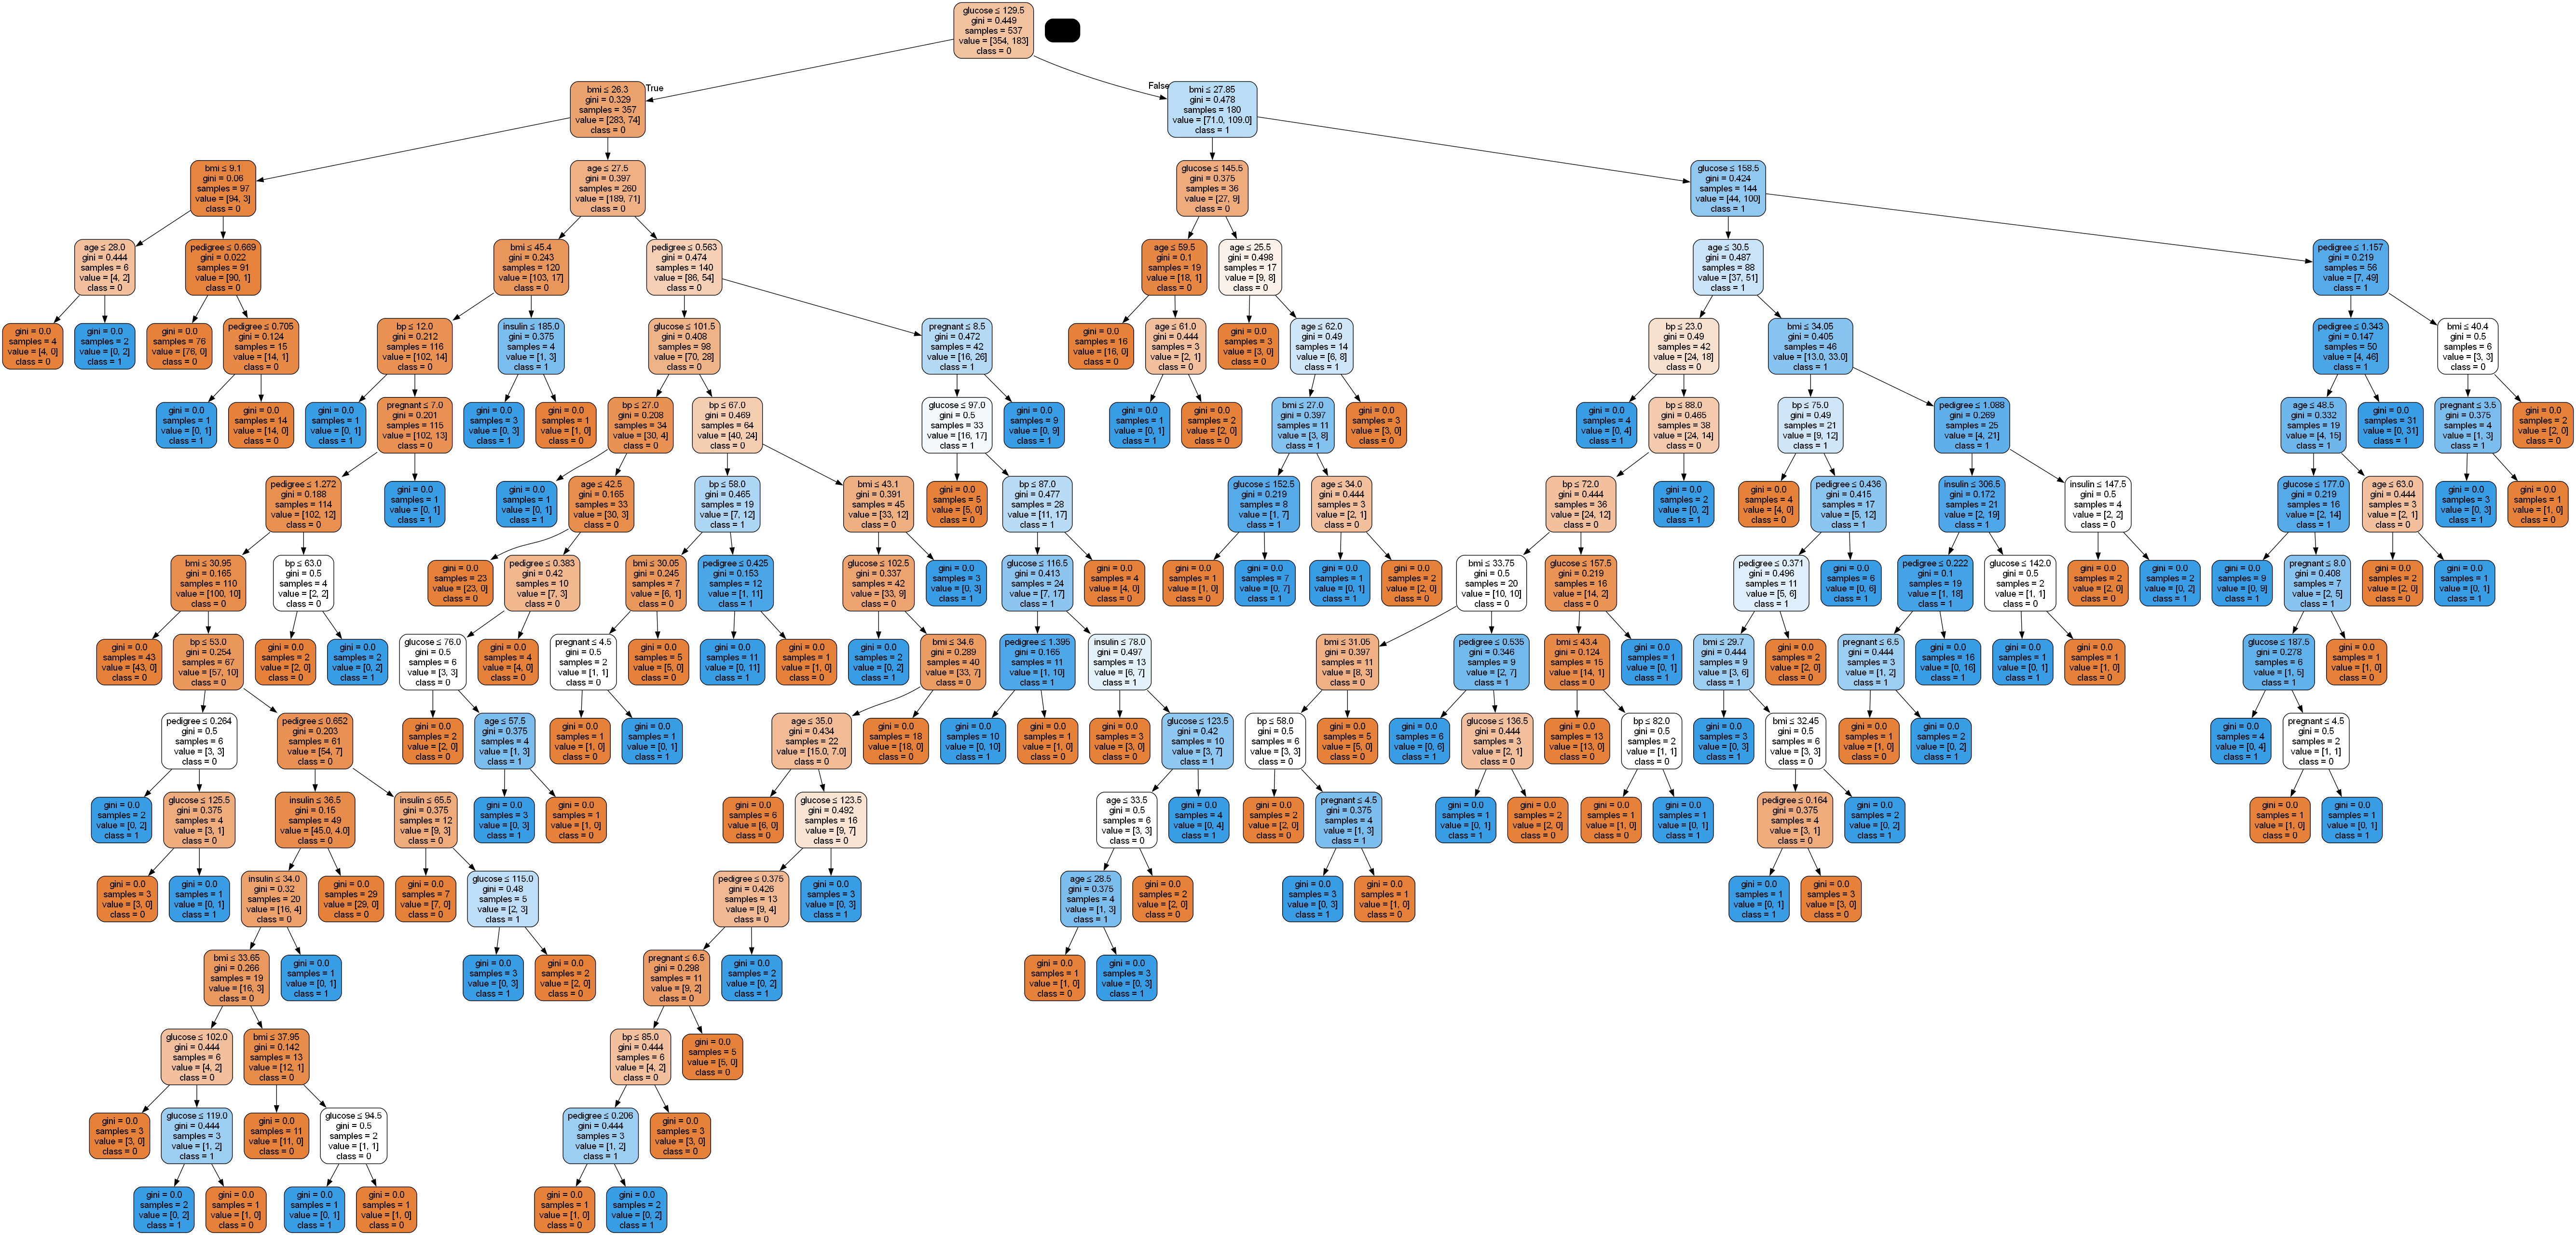

In [89]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7705627705627706


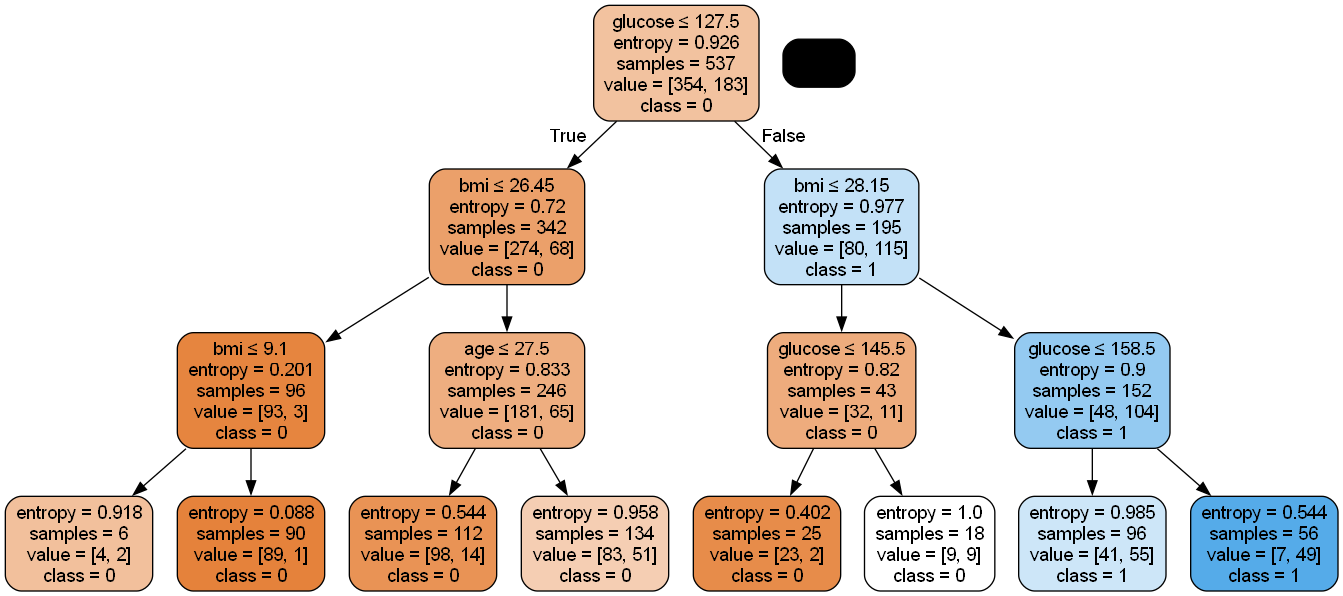

In [ ]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())